In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [20]:
df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [21]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

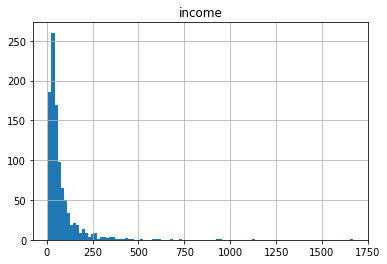

In [22]:
df.hist(column='income',bins=100)

In [23]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [24]:
# converting pandas into numpy array
# features set
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [30]:
# label set
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

Normalize Data

In [31]:
# X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# X[0:5]

Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k=4
# train model and predict by changing the value of k
ngh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
ngh

KNeighborsClassifier(n_neighbors=4)

In [36]:
# pridicting
y_pred=ngh.predict(X_test)
y_pred

array([3, 1, 3, 4, 4, 3, 3, 1, 2, 2, 4, 1, 3, 4, 3, 1, 2, 2, 3, 2, 3, 3,
       4, 2, 1, 3, 1, 4, 1, 4, 2, 4, 4, 2, 1, 2, 3, 4, 1, 1, 1, 4, 3, 2,
       3, 1, 4, 1, 2, 4, 3, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2, 4, 2, 4, 3,
       1, 2, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 4, 3, 1, 1, 1, 1, 3, 4,
       1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 4, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3,
       1, 1, 2, 4, 3, 1, 1, 2, 2, 1, 1, 1, 2, 4, 1, 1, 4, 4, 1, 1, 1, 3,
       1, 2, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 1, 1, 4, 1, 2, 1, 3, 2, 3,
       3, 4, 3, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 4, 1, 2, 3, 3, 3, 4, 3,
       4, 1, 4, 4, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 2,
       2, 3], dtype=int64)

In [38]:
# Accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ngh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


In [46]:
k=7
# train model and predict by changing the value of k
ngh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

y_pred=ngh.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ngh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.49625
Test set Accuracy:  0.35


For other K's

In [47]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

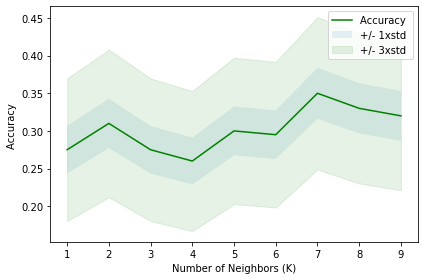

In [50]:
# plotting the model of accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()